# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load .env enviroment variables

load_dotenv()


True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets

mybtc = 1.2
my_eth = 5.3


In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
btc_url = btc_url + '?format=json'

In [6]:
#Execute a GET request

btc_response_data = requests.get(btc_url).json()
print(btc_response_data)


{'data': {'1': {'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'website_slug': 'bitcoin', 'rank': 1, 'circulating_supply': 18940112, 'total_supply': 18940112, 'max_supply': 21000000, 'quotes': {'USD': {'price': 36852.0, 'volume_24h': 45326268930, 'market_cap': 698801595122, 'percentage_change_1h': -0.378192297134436, 'percentage_change_24h': 1.16475085642752, 'percentage_change_7d': -13.0759219402417, 'percent_change_1h': -0.378192297134436, 'percent_change_24h': 1.16475085642752, 'percent_change_7d': -13.0759219402417}}, 'last_updated': 1643166249}}, 'metadata': {'timestamp': 1643166249, 'num_cryptocurrencies': 3105, 'error': None}}


In [7]:
# Fetch current BTC price

btc_price = btc_response_data['data']["1"]['quotes']['USD']["price"]

# Display sample data

print('Bitcoin Price:', btc_price)


Bitcoin Price: 36852.0


In [8]:
# Fetch current ETH price

eth_response_data = requests.get(eth_url).json()
eth_price = eth_response_data['data']["1027"]['quotes']['USD']["price"]

# Compute current value of my crpto

current_btc_value = mybtc * btc_price
current_eth_value = my_eth * eth_price
total_crypto_value = current_btc_value + current_eth_value

total_crypto_value

# Print current crypto wallet balance
print(f"The current value of your {mybtc} BTC is ${current_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${current_eth_value:0.2f}")

print(f'Total Value of Crypto Assets: ${total_crypto_value:0.2f}')

The current value of your 1.2 BTC is $44222.40
The current value of your 5.3 ETH is $12974.93
Total Value of Crypto Assets: $57197.33


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [9]:
# Set current amount of shares

my_agg = 200
my_spy = 50


In [10]:
# Set Alpaca API key and secret

alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")


Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [11]:
# Create the Alpaca API object

alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")


In [12]:
# Format current date as ISO format

today = pd.Timestamp("2022-01-21", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)

start = pd.Timestamp("2017-01-21", tz="America/New_York").isoformat()
end = pd.Timestamp("2022-01-21", tz="America/New_York").isoformat()

df_portfolio_year = alpaca.get_barset(
    tickers,
    timeframe,
    start = start,
    end = end,
    limit = 1000
).df
# Preview DataFrame

df_portfolio_year.head()


AGG                                        \
                             open      high     low    close     volume   
time                                                                      
2018-02-01 00:00:00-05:00  107.75  107.8250  107.48  107.490  8569565.0   
2018-02-02 00:00:00-05:00  107.25  107.3450  107.10  107.200  4266243.0   
2018-02-05 00:00:00-05:00  107.12  107.8100  107.00  107.630  4879995.0   
2018-02-06 00:00:00-05:00  107.46  107.5600  107.28  107.300  5489931.0   
2018-02-07 00:00:00-05:00  107.43  107.4369  107.00  107.085  3440626.0   

                              SPY                                       
                             open    high     low   close       volume  
time                                                                    
2018-02-01 00:00:00-05:00     NaN     NaN     NaN     NaN          NaN  
2018-02-02 00:00:00-05:00  280.08  280.23  275.41  275.52  121717871.0  
2018-02-05 00:00:00-05:00  273.47  275.85  263.31  264.18  205971586.0  
2018-02-06 00:00:00-05:00  259.99  269.70  254.12  269.18  232359323.0  
2018-02-07 00:00:00-05:00  268.50  272.36  267.63  267.66  112819262.0

In [13]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!
df_portfolio_year = alpaca.get_barset(
    tickers,
    timeframe,
    start = start,
    end = end,
    limit = 1000
).df
# Print AGG and SPY close prices

df_closing_prices = pd.DataFrame()

df_closing_prices["AGG"] = df_portfolio_year["AGG"]["close"]
df_closing_prices["SPY"] = df_portfolio_year["SPY"]["close"]

df_closing_prices.index = df_closing_prices.index.date

df_closing_prices.tail(10)


,AGG,SPY
2022-01-07,112.50,466.12
2022-01-10,112.41,465.56
2022-01-11,112.61,469.74
2022-01-12,112.60,471.06
2022-01-13,112.80,464.54
2022-01-14,112.17,464.68
2022-01-18,111.49,456.53
2022-01-19,111.71,451.79
2022-01-20,111.79,446.79
2022-01-21,112.24,438.11


In [14]:
#Showing the current closing prices

agg_close = df_portfolio_year['AGG']['close']['2022-01-21']
spy_close = df_portfolio_year['SPY']['close']['2022-01-21']                          

print(f'Current AGG closing price: ${agg_close}')
print(f'Current SPY closing price: ${spy_close}')


Current AGG closing price: $112.24
Current SPY closing price: $438.11


In [15]:
#Showing the current value of fixed income and equity positions

my_agg_value = my_agg * agg_close
my_spy_value = my_spy * spy_close
total_stock_value =my_agg_value + my_spy_value

total_stock_value


# Print current value of fixed income and equity positions

print(f"The current value of your {my_agg} AGG is ${my_agg_value:0.2f}")
print(f"The current value of your {my_spy} SPY is ${my_spy_value:0.2f}")

print(f'Total Value of Fixed Income and Equity Investments: ${total_stock_value:0.2f}')

The current value of your 200 AGG is $22448.00
The current value of your 50 SPY is $21905.50
Total Value of Fixed Income and Equity Investments: $44353.50


### Savings Health Analysis

In [39]:
# Set monthly household income

monthly = 12000

# Consolidate financial assets data

df_savings_data = [total_crypto_value,  total_stock_value] 

# Create savings DataFrame

df_savings = pd.DataFrame(df_savings_data, columns=['Amount'], index = ['Crypto', 'Shares'])

# Display savings DataFrame

display(df_savings)


,Amount
Crypto,57197.33
Shares,44353.50


<AxesSubplot:title={'center':'Personal Savings'}, ylabel='Amount'>

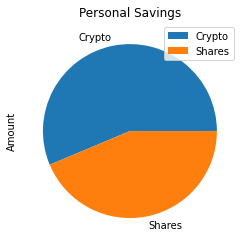

In [18]:
# Plot savings pie chart

df_savings.plot.pie(y='Amount', title = 'Personal Savings')


In [19]:
# Set ideal emergency fund

emergency_fund = monthly * 3

# Calculate total amount of savings

total_savings = float(df_savings.sum())

# Validate saving health / Python For Loop

if total_savings > emergency_fund:
    print(f'You have enough saved!')
elif total_savings == emergency_fund:
    print(f'You have reached your goal!')
else:
    print(f'You are {emergancy_fund - total_savings} short of your goal!!')



You have enough saved!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [21]:

alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")


Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [22]:

alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")


In [23]:

today = pd.Timestamp("2022-01-21", tz="America/New_York").isoformat()
tickers = ["AGG", "SPY"]
timeframe = "1D"

# Set start and end dates of five years back from today.

# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2017-01-21', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2022-01-21', tz='America/New_York').isoformat()

monte_carlo_df = alpaca.get_barset(
    tickers,
    timeframe,
    start = start,
    end = end,
    limit = 1000
).df


In [24]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
# YOUR CODE HERE!

# Preview DataFrame
# YOUR CODE HERE!

# Display sample data
monte_carlo_df

AGG                                        \
                             open      high     low    close     volume   
time                                                                      
2018-02-01 00:00:00-05:00  107.75  107.8250  107.48  107.490  8569565.0   
2018-02-02 00:00:00-05:00  107.25  107.3450  107.10  107.200  4266243.0   
2018-02-05 00:00:00-05:00  107.12  107.8100  107.00  107.630  4879995.0   
2018-02-06 00:00:00-05:00  107.46  107.5600  107.28  107.300  5489931.0   
2018-02-07 00:00:00-05:00  107.43  107.4369  107.00  107.085  3440626.0   
...                           ...       ...     ...      ...        ...   
2022-01-14 00:00:00-05:00  112.53  112.5450  112.15  112.170  8362916.0   
2022-01-18 00:00:00-05:00  111.81  111.8600  111.47  111.490  7390142.0   
2022-01-19 00:00:00-05:00  111.70  111.8900  111.65  111.710  7641972.0   
2022-01-20 00:00:00-05:00  111.84  111.9000  111.75  111.790  6861797.0   
2022-01-21 00:00:00-05:00  112.19  112.3500  112.11  112.240  7792653.0   

                              SPY                                         
                             open      high     low   close       volume  
time                                                                      
2018-02-01 00:00:00-05:00     NaN       NaN     NaN     NaN          NaN  
2018-02-02 00:00:00-05:00  280.08  280.2300  275.41  275.52  121717871.0  
2018-02-05 00:00:00-05:00  273.47  275.8500  263.31  264.18  205971586.0  
2018-02-06 00:00:00-05:00  259.99  269.7000  254.12  269.18  232359323.0  
2018-02-07 00:00:00-05:00  268.50  272.3600  267.63  267.66  112819262.0  
...                           ...       ...     ...     ...          ...  
2022-01-14 00:00:00-05:00  461.19  465.0900  459.90  464.68   84363989.0  
2022-01-18 00:00:00-05:00  459.73  459.9600  455.31  456.53   95565773.0  
2022-01-19 00:00:00-05:00  458.17  459.6124  451.46  451.79   95311817.0  
2022-01-20 00:00:00-05:00  453.75  458.7400  444.50  446.79  105009751.0  
2022-01-21 00:00:00-05:00  445.56  448.0600  437.97  438.11  174541929.0  

[1001 rows x 10 columns]

In [25]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_even_dist = MCSimulation(
    portfolio_data = monte_carlo_df,
    weights = [.40, .60],
    num_simulation = 1000,
    num_trading_days = 252*30
)


MC_even_dist.portfolio_data.head()

AGG                                        \
                             open      high     low    close     volume   
time                                                                      
2018-02-01 00:00:00-05:00  107.75  107.8250  107.48  107.490  8569565.0   
2018-02-02 00:00:00-05:00  107.25  107.3450  107.10  107.200  4266243.0   
2018-02-05 00:00:00-05:00  107.12  107.8100  107.00  107.630  4879995.0   
2018-02-06 00:00:00-05:00  107.46  107.5600  107.28  107.300  5489931.0   
2018-02-07 00:00:00-05:00  107.43  107.4369  107.00  107.085  3440626.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2018-02-01 00:00:00-05:00          NaN     NaN     NaN     NaN     NaN   
2018-02-02 00:00:00-05:00    -0.002698  280.08  280.23  275.41  275.52   
2018-02-05 00:00:00-05:00     0.004011  273.47  275.85  263.31  264.18   
2018-02-06 00:00:00-05:00    -0.003066  259.99  269.70  254.12  269.18   
2018-02-07 00:00:00-05:00    -0.002004  268.50  272.36  267.63  267.66   

                                                     
                                volume daily_return  
time                                                 
2018-02-01 00:00:00-05:00          NaN          NaN  
2018-02-02 00:00:00-05:00  121717871.0          NaN  
2018-02-05 00:00:00-05:00  205971586.0    -0.041159  
2018-02-06 00:00:00-05:00  232359323.0     0.018926  
2018-02-07 00:00:00-05:00  112819262.0    -0.005647

In [26]:
# Printing the simulation input data
# YOUR CODE HERE!

In [27]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002252,1.004730,0.999691,0.991089,0.991627,1.002865,1.013076,0.995486,1.003418,1.010810,...,1.006039,1.011284,0.996948,0.999754,0.998737,0.995484,1.008773,0.995241,0.994923,0.994704
2,0.993060,1.014303,1.004501,1.004145,0.983806,1.000607,1.020681,1.007714,0.997354,1.013808,...,1.002343,1.025848,0.996570,1.000826,1.013864,0.983966,1.003834,0.996911,1.003525,1.000872
3,1.004210,1.009874,1.006033,1.006409,0.977917,0.998055,1.023699,1.017169,1.006688,1.003882,...,0.990873,1.026174,0.999805,1.000797,1.009797,0.976390,1.006777,0.994253,1.005974,1.007166
4,1.009459,1.008437,1.013474,1.027168,0.974221,1.009589,1.026658,1.019646,0.996311,1.007006,...,0.995785,1.024330,1.008276,0.997024,1.006416,0.963849,0.998369,1.002580,1.006596,1.001961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,19.538213,17.463424,34.264830,9.469088,11.598935,13.466396,4.432536,8.988534,8.609407,3.427462,...,9.012297,25.835825,28.468763,17.346343,12.035901,12.823238,14.953566,7.252161,6.363121,8.778674
7557,19.484866,17.247697,34.284433,9.318522,11.681744,13.388625,4.439561,8.946101,8.668630,3.426242,...,8.974232,25.913922,28.691240,17.519321,11.987048,12.690710,14.843394,7.270627,6.336509,8.770299
7558,19.368822,17.275076,34.761998,9.327044,11.663646,13.399519,4.415683,9.026273,8.616752,3.420448,...,9.006796,26.277261,28.729501,17.536305,12.040114,12.815014,14.924013,7.299482,6.370882,8.731930
7559,19.539827,17.260638,34.982275,9.288015,11.595256,13.406991,4.436677,9.108814,8.586365,3.426776,...,9.000882,25.818282,28.581425,17.627913,12.119625,12.650408,15.175302,7.251344,6.388329,8.631684


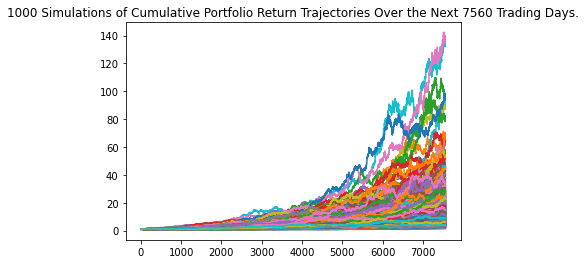

In [28]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot = MC_even_dist.plot_simulation()

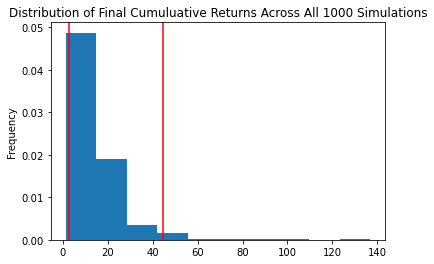

In [29]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot = MC_even_dist.plot_distribution()

### Retirement Analysis

In [30]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
even_tbl = MC_even_dist.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!
print(even_tbl)

count           1000.000000
mean              14.621189
std               12.505165
min                1.369154
25%                7.282727
50%               11.423130
75%               17.771791
max              136.801765
95% CI Lower       2.897687
95% CI Upper      44.710698
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [31]:
# Set initial investment
initial_investment = 20000
ci_lower = round(even_tbl[8]*initial_investment,2)
ci_upper = round(even_tbl[9]*initial_investment,2)

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $57953.75 and $894213.96


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [32]:
# Set initial investment
initial_investment = 20000 * 1.5
ci_lower = round(even_tbl[8]*initial_investment,2)
ci_upper = round(even_tbl[9]*initial_investment,2)
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $86930.62 and $1341320.94


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [33]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [34]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [35]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [36]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [37]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [38]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

NameError: name 'ci_lower_five' is not defined

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")